In [1]:
# Tejas Acharya
# EE-541
# Homework 03
# Problem 03
# 06-06-2023

In [2]:
#Importing Libraries
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Constants
NETWORK_PARAMS_FILENAME = './mnist_network_params.hdf5'
MNIST_TESTDATA_FILENAME = './mnist_testdata.hdf5'
PARAM_KEYS = ['W1', 'W2', 'W3', 'b1', 'b2', 'b3']
MNIST_X_KEY = 'xdata'
MNIST_Y_KEY = 'ydata'

In [4]:
class MLP():
    def __init__(self, param_file, param_keys):
        with h5py.File(param_file) as hf:
            self.W1 = hf[param_keys[0]][:]
            self.W2 = hf[param_keys[1]][:]
            self.W3 = hf[param_keys[2]][:]
            self.b1 = hf[param_keys[3]][:]
            self.b2 = hf[param_keys[4]][:]
            self.b3 = hf[param_keys[5]][:]
            
        assert self.W1.shape == (200, 784)
        assert self.b1.shape == (200,)
        
        assert self.W2.shape == (100, 200)
        assert self.b2.shape == (100,)
        
        assert self.W3.shape == (10, 100)
        assert self.b3.shape == (10,)
        
        
    def predict(self, x):
        z1 = np.dot(self.W1, x) + self.b1
        a1 = self.relu(z1)
        
        z2 = np.dot(self.W2, a1) + self.b2
        a2 = self.relu(z2)
        
        z3 = np.dot(self.W3, a2) + self.b3
        y_hat = self.softmax(z3)
        
        return y_hat
        
    
    def relu(self, x):
        return np.maximum(x, np.zeros_like(x))
    
    
    def softmax(self, x):
        return np.exp(x) / np.sum(np.exp(x))

In [5]:
#Load Test Data
with h5py.File(MNIST_TESTDATA_FILENAME) as hf:
    images = hf[MNIST_X_KEY][:]
    labels = hf[MNIST_Y_KEY][:]

assert images.shape == (10000, 784)
assert labels.shape == (10000, 10)

In [6]:
num_correct = 0

model = MLP(NETWORK_PARAMS_FILENAME, PARAM_KEYS)

for x, y in zip(images, labels):
    y_hat = model.predict(x)
    label_hat = np.argmax(y_hat)
    label = np.argmax(y)
    num_correct += 1 if (label == label_hat) else 0

In [7]:
print(f'The number of correctly classified images is {num_correct}.')

The number of correctly classified images is 9790.


By going through the dataset and the prediction, I found image at index 8 was misclassified.


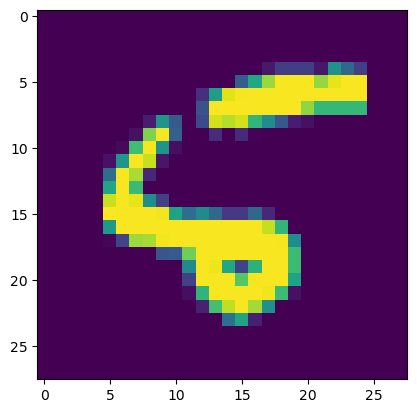

The actual label of the image is 5.
The predicted label of the image is 6.


In [8]:
print('By going through the dataset and the prediction, I found image at index 8 was misclassified.')

plt.figure()
plt.imshow(images[8].reshape(28,28))
plt.show() 
print(f'The actual label of the image is {np.argmax(labels[8])}.')
print(f'The predicted label of the image is {np.argmax(model.predict(images[8]))}.')

In [9]:
print('By inspecting the above image visually, it is obvious for the model to predict the image as 6 instead of 5, because the image is ambiguosly 5 and 6 to the human eye.')

By inspecting the above image visually, it is obvious for the model to predict the image as 6 instead of 5, because the image is ambiguosly 5 and 6 to the human eye.
